# Project 4 Model Classification
Serena Shah | ss94574  
Osvaldo Salinas | os____
## Loading and Preprocessing Data

We first import necessary libraries and and loading the data into a Pandas dataframe.

In [156]:
import pandas as pd
import numpy as np

# read in data
flooding = pd.read_csv('data/HighWaterMarks.csv')

We now identify the shape and size of the raw data.

In [157]:
# data shape
flooding.shape

(2240, 47)

In [158]:
# data size
flooding.size

105280

Next we look at information about the data types of the data columns.

In [159]:
flooding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OBJECTID            2240 non-null   int64  
 1   HWMID               2191 non-null   object 
 2   HWM_TYPE            2192 non-null   object 
 3   WTSHUNIT            2184 non-null   object 
 4   WTSHNAME            2185 non-null   object 
 5   UNIT_NO             2162 non-null   object 
 6   CHAN_NAME           2069 non-null   object 
 7   ROAD_NAME           2098 non-null   object 
 8   STAGEGAGE           635 non-null    object 
 9   BM_NO               2048 non-null   object 
 10  BM_DESC             2034 non-null   object 
 11  BM_ELEV             2035 non-null   float64
 12  ADJUST              2037 non-null   float64
 13  SE10YR              2044 non-null   float64
 14  SE50YR              2044 non-null   float64
 15  SE100YR             2044 non-null   float64
 16  SE500Y

There are 46 columns of information. To understand the data in a digestible way let's create a new dataframe that contains only predictive variables of interest and our response variable of interest: flood levels. The predictive variables we will consider are benchmark elevation, longitude, latitude, and the Standard Engineering Storm Event for 10, 50, 100, and 500 years.

In [160]:
columns_to_keep = ['Water_Level_Change', 'BM_ELEV','SE10YR', 'SE50YR', 'SE100YR', 'SE500YR', 'POINT_X', 'POINT_Y'] # ChatGPT solution (in place of dropping each col individually)
flooding = flooding[columns_to_keep]

# filtered dataframe
flooding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Water_Level_Change  2015 non-null   float64
 1   BM_ELEV             2035 non-null   float64
 2   SE10YR              2044 non-null   float64
 3   SE50YR              2044 non-null   float64
 4   SE100YR             2044 non-null   float64
 5   SE500YR             2044 non-null   float64
 6   POINT_X             2181 non-null   float64
 7   POINT_Y             2181 non-null   float64
dtypes: float64(8)
memory usage: 140.1 KB


There are 2240 entries of data, yet all of the columns have less entries each, indicating the presence of NaN/missing values. We will address these by replacing them with some sort of statistic appropriate for the variable, either its mode or median, to preserve data.

In [161]:
# fill columns NaN with their medians
flooding['Water_Level_Change'] = flooding['Water_Level_Change'].fillna(flooding['Water_Level_Change'].median())
flooding['BM_ELEV'] = flooding['BM_ELEV'].fillna(flooding['BM_ELEV'].median())
flooding['SE10YR'] = flooding['SE10YR'].fillna(flooding['SE10YR'].median())
flooding['SE50YR'] = flooding['SE50YR'].fillna(flooding['SE50YR'].median())
flooding['SE100YR'] = flooding['SE100YR'].fillna(flooding['SE100YR'].median())
flooding['SE500YR'] = flooding['SE500YR'].fillna(flooding['SE500YR'].median())
flooding['POINT_X'] = flooding['POINT_X'].fillna(flooding['POINT_X'].median())
flooding['POINT_Y'] = flooding['POINT_Y'].fillna(flooding['POINT_Y'].median())

# output new dataframe
flooding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Water_Level_Change  2240 non-null   float64
 1   BM_ELEV             2240 non-null   float64
 2   SE10YR              2240 non-null   float64
 3   SE50YR              2240 non-null   float64
 4   SE100YR             2240 non-null   float64
 5   SE500YR             2240 non-null   float64
 6   POINT_X             2240 non-null   float64
 7   POINT_Y             2240 non-null   float64
dtypes: float64(8)
memory usage: 140.1 KB


Because we want to perform classification rather than regression, we will convert our response variable of water level change from a numeric response variable to a categorical variable of three categories: low, medium, and high flood levels.

In [162]:
# from ChatGPT (splitting numeric data into 3 categories reflective of data's spread)

# Perform quantile-based binning
bins = pd.qcut(flooding['Water_Level_Change'], 3, labels=False)
bins, bin_edges = pd.qcut(flooding['Water_Level_Change'], 3, labels=False, retbins=True)

# the edges of each bin to understand how ranges are being cast to categories
bin_edges

array([ 0.        ,  2.94442007,  6.03      , 29.75      ])

In [163]:
# category type cast
flooding['Water_Level_Change'] = pd.Series(bins, dtype='category')

flooding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Water_Level_Change  2240 non-null   category
 1   BM_ELEV             2240 non-null   float64 
 2   SE10YR              2240 non-null   float64 
 3   SE50YR              2240 non-null   float64 
 4   SE100YR             2240 non-null   float64 
 5   SE500YR             2240 non-null   float64 
 6   POINT_X             2240 non-null   float64 
 7   POINT_Y             2240 non-null   float64 
dtypes: category(1), float64(7)
memory usage: 124.9 KB


In [164]:
flooding.head()

,Water_Level_Change,BM_ELEV,SE10YR,SE50YR,SE100YR,SE500YR,POINT_X,POINT_Y
0,1,20.35,14.4,17.1,18.3,21.5,-95.294913,29.727903
1,2,21.97,18.1,20.7,21.9,24.7,-95.305002,29.722366
2,2,31.49,21.7,24.4,25.6,28.3,-95.310761,29.712124
3,2,25.65,23.4,26.0,27.3,30.2,-95.313396,29.708855
4,2,32.17,24.9,27.8,29.2,32.0,-95.316752,29.709566


We can see that the categories are numeric now, either [0, 1, 2]. These correspond to the bins from lowest value to highest value respectively.

## Leveraging Basic Predictive Models

We will now begin building and assessing a model to predict flooding levels. First we will split the data in to testing and training sets. The flooding/water change level is our independent variable and our dependent variables are all aforementioned columns in the dataframe.

In [165]:
# x are the dependent variables and y is the target variable
X = flooding.drop('Water_Level_Change', axis=1)
y = flooding['Water_Level_Change']

# import lib to split data
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# splitting the data in 70:30 ratio, reproducible split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # no stratify due to numeric response variable

X_train.shape

(1568, 7)

In [166]:
X_test.shape

(672, 7)

Now we will perform classification using basic supervised learning techniques: K-Nearest Neighbor Classifier and Naive Bayes.

### K-Nearest Neighbor Classifier
We'll import the KNN classification function. We need to convert

In [167]:
# import knn classifier function
from sklearn.neighbors import KNeighborsClassifier

Instead of setting our *k* value with a guess, we will search for the optimal *k* hyperparameter.

In [168]:
# we do not pass a value for k here
knn_search_accuracy = KNeighborsClassifier() # from ChatGPT (replacing Classifier with Regressor due to numeric response var)

# dict of vals to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 100)}

We will perform cross-validation on the data to find the optimal hyperparameter *k*, using a fold count of 5. 

In [169]:
# instantiate gridsearchCV object with 5 folds
from sklearn.model_selection import GridSearchCV
knn_gscv = GridSearchCV(knn_search_accuracy, param_grid, cv=5, scoring='accuracy') 

# fit model to data using cv folds and compute the accuracy
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='accuracy')

Now that our model has been fit using the cross-validation grid, the `sklearn` lib can output the optimal *k* value for our testing and training datasets.

In [170]:
# knn model with optimal k 
knn = knn_gscv.best_estimator_

# check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 15}

It seems that the optimal *k* number of neighbors to use for our model is 15. Let's look at how our model performed in accuracy, recall, precision, and F1 scoring. Its performance on the testing set will tell us about its predictive abilities and its performance on the training set will tell us if there was a potential overfitting to the training data.

In [171]:
from sklearn.metrics import classification_report
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))


              precision    recall  f1-score   support

           0       0.54      0.68      0.60       238
           1       0.69      0.38      0.49       242
           2       0.50      0.62      0.55       192

    accuracy                           0.56       672
   macro avg       0.58      0.56      0.55       672
weighted avg       0.58      0.56      0.55       672



### Naive Bayes
We will now use Multinomial Naive Bayes supervised learning to predict flooding levels and evaluate how the model performed the same statistics used above for model evaluation.

In [173]:
from sklearn.naive_bayes import GaussianNB

# instantiate gaussian NB model, fit, and predict
mnb = GaussianNB()
y_pred_nb = mnb.fit(X_train, y_train).predict(X_test)

# print classification report
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.43      0.21      0.28       238
           1       0.43      0.12      0.19       242
           2       0.28      0.72      0.41       192

    accuracy                           0.32       672
   macro avg       0.38      0.35      0.29       672
weighted avg       0.39      0.32      0.28       672



### Decision Tree
We will now use a Decision Tree to predict high flooding levels in patients and evaluate how the model performed in accuracy, recall, precision, and F1 scoring.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# instantiate decision tree model, fit, and predict
dt = DecisionTreeClassifier(random_state=1)
y_pred_dt = dt.fit(X_train, y_train).predict(X_test)

# print classification report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

       False       0.79      0.74      0.76        61
        True       0.45      0.52      0.48        25

    accuracy                           0.67        86
   macro avg       0.62      0.63      0.62        86
weighted avg       0.69      0.67      0.68        86



[Text(0.7693602693602694, 0.9772727272727273, 'x[24] <= 0.5\ngini = 0.42\nsamples = 200\nvalue = [140, 60]'),
 Text(0.632996632996633, 0.9318181818181818, 'x[8] <= 0.5\ngini = 0.352\nsamples = 162\nvalue = [125, 37]'),
 Text(0.6195286195286195, 0.8863636363636364, 'x[12] <= 0.5\ngini = 0.385\nsamples = 142\nvalue = [105, 37]'),
 Text(0.494949494949495, 0.8409090909090909, 'x[3] <= 0.5\ngini = 0.353\nsamples = 118\nvalue = [91, 27]'),
 Text(0.4074074074074074, 0.7954545454545454, 'x[9] <= 0.5\ngini = 0.331\nsamples = 105\nvalue = [83, 22]'),
 Text(0.3400673400673401, 0.75, 'x[1] <= 0.5\ngini = 0.354\nsamples = 87\nvalue = [67, 20]'),
 Text(0.3265993265993266, 0.7045454545454546, 'x[6] <= 0.5\ngini = 0.344\nsamples = 86\nvalue = [67, 19]'),
 Text(0.2727272727272727, 0.6590909090909091, 'x[28] <= 0.5\ngini = 0.317\nsamples = 71\nvalue = [57.0, 14.0]'),
 Text(0.25925925925925924, 0.6136363636363636, 'x[0] <= 2.5\ngini = 0.342\nsamples = 64\nvalue = [50, 14]'),
 Text(0.23232323232323232, 0.

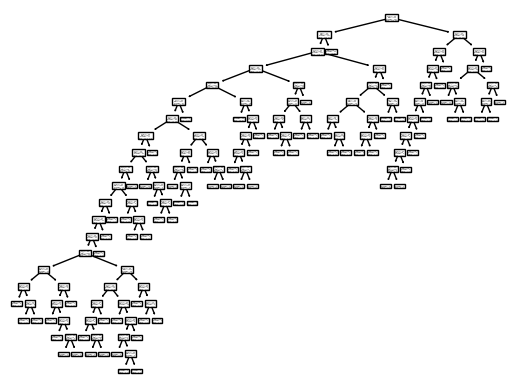

In [ ]:
from sklearn import tree
tree.plot_tree(dt.fit(X_train, y_train))

## Leveraging Advanced Predictive Models